## Name: Pratiksha Rale

# Employee Turnover Prediction
Employee Turnover is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.<br>

A Company uses this predictive analysis to measure how many employees they will need if the potential employees will leave their organization. A company also uses this predictive analysis to make the workplace better for employees by understanding the core reasons for the high turnover ratio.<br>

Here 'left' is the target (dependent) variable

**Reason for choosing this project:** The problem of the employee turnover has leading huge issues in organizations because of its negative impacts on issues ranging from work place morale and productivity and it will disturbs the project continuity and to long term growth strategies. The reason for the choosing this problem statement are as follows: 

i)To understand data mining techniques for performance prediction of employees.

ii)To explore various personal as well as work variables impacting employee voluntary turnover.

iii) Analyzing employee turnover using different machine learning algorithms such as Random Forest and Logistic Regression.

### Import Library and dataset

For training the machine learning models we have to initially import the relevant libraries such as numpy, pandas, matplotlib and seaborn and the dataset that I had referred from the Kaggle website for predicting the employee turnover.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\VIEH_Internship\VIEH_Internship\dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



<br>


### Data Preprocessing

In this pre-processing basically we deals with the gathering the dataset information, data statistics, handling the missing value and columns operation. Basically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

##### Data Info

In [3]:
df.shape

(14999, 10)

This dataset contains 10 columns (features) and 14999 rows (records)

##### Column list

In [4]:
df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

##### dataframe info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Here sales and salary columns are object (string) datatype

##### Missing Value Handing - Checking Null Value

In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There is no null value (NaN)

##### Data statistics

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<br>

##### Chnage the column name

In [8]:
df = df.rename(columns={'sales' : 'department'})

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### Change the columns values 

The 'department' column of the dataset has many categories, need to reduce the categories for better modelling. 
Let’s see all the categories of the department column:

In [10]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Here we can merge “technical”, “support” and “IT” columns into one column to make our analysis easier.

In [11]:
df['department']=np.where(df['department'] =='support', 'technical', df['department'])

df['department']=np.where(df['department'] =='support', 'technical', df['department'])

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,low
14995,0.37,0.48,2,160,3,0,1,0,technical,low
14996,0.37,0.53,2,143,3,0,1,0,technical,low
14997,0.11,0.96,6,280,4,0,1,0,technical,low


Changed column value of “support” and “IT” into "Technical"

<br>

### Categorical to Numerical - Feature Transformation

I will use LabelEncoder() from sklearn library to convert categorical data to numerical data. Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.

##### Label Encoder

In [12]:
final = {'sales':1, 'accounting':2, 'hr':3, 'technical':4, 'support':5, 'management':6, 'IT':7, 'product_mng':8, 'marketing':9, 'RandD':10}
df["dept"] = df.department.map(final)
final1 = {'low':1, 'medium':2, 'high':3}
df["sal"] = df.salary.map(final1)
df

# df['salary'] = encoder1.fit_transform(df)


# depart = pd.get_dummies(df['department'], prefix='department', drop_first=True )
# sales = pd.get_dummies(df['salary'], prefix='salary', drop_first=True )

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,dept,sal
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,low,4,1
14995,0.37,0.48,2,160,3,0,1,0,technical,low,4,1
14996,0.37,0.53,2,143,3,0,1,0,technical,low,4,1
14997,0.11,0.96,6,280,4,0,1,0,technical,low,4,1


In [13]:
df=df.drop(['department', 'salary'], axis=1)

Now the actual variables need to be removed after the dummy variable have been created. Column names after creating dummy variables for categorical variables:

In [14]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,sal
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,4,1
14995,0.37,0.48,2,160,3,0,1,0,4,1
14996,0.37,0.53,2,143,3,0,1,0,4,1
14997,0.11,0.96,6,280,4,0,1,0,4,1


In [15]:
df.shape

(14999, 10)

Now this dataset contains 10 columns (features) and 14999 rows (records)

<br>

### Data Visualization

It basically has three aspects which are Get Insights, Outlier detection and Correlation.

##### Gets insights

In [16]:
# sns.scatterplot(df['satisfaction_level'], df['left'])

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_evaluation', ylabel='left'>

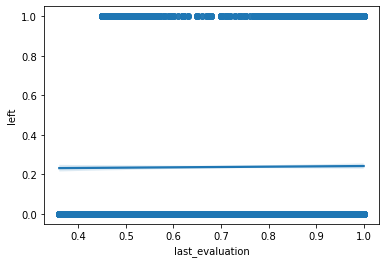

In [17]:
sns.regplot(df['last_evaluation'], df['left'])

##### Distribution 

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

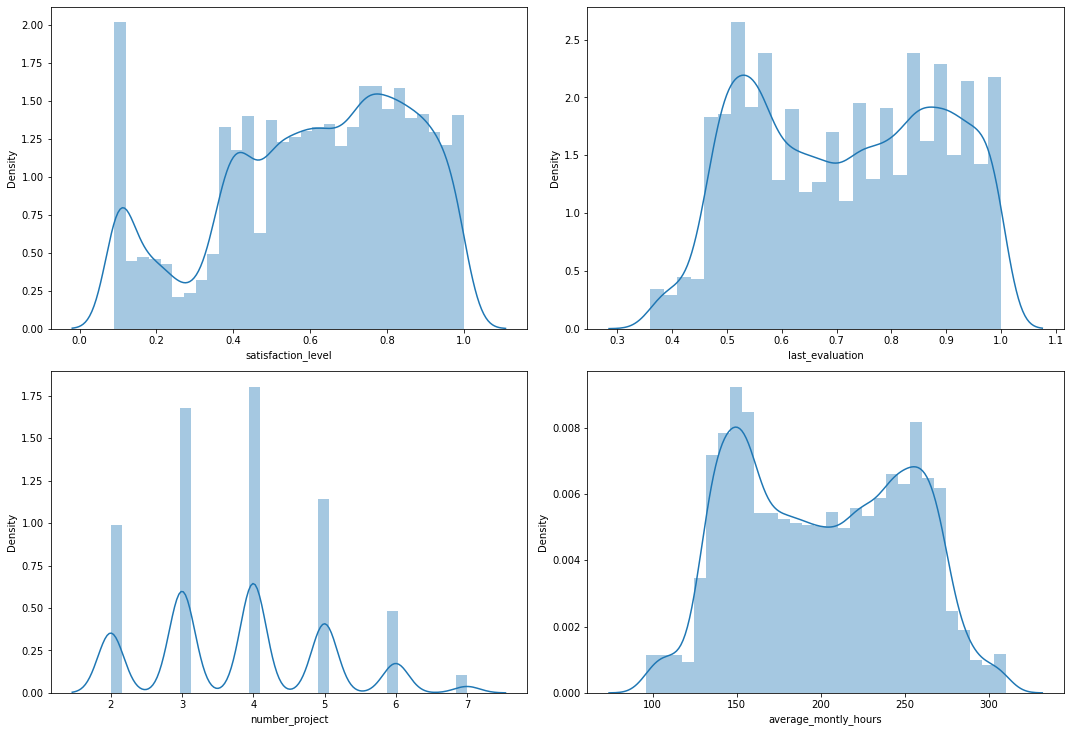

In [18]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.distplot(df[col])
    plt_num += 1
plt.tight_layout()

#### Outlier handing

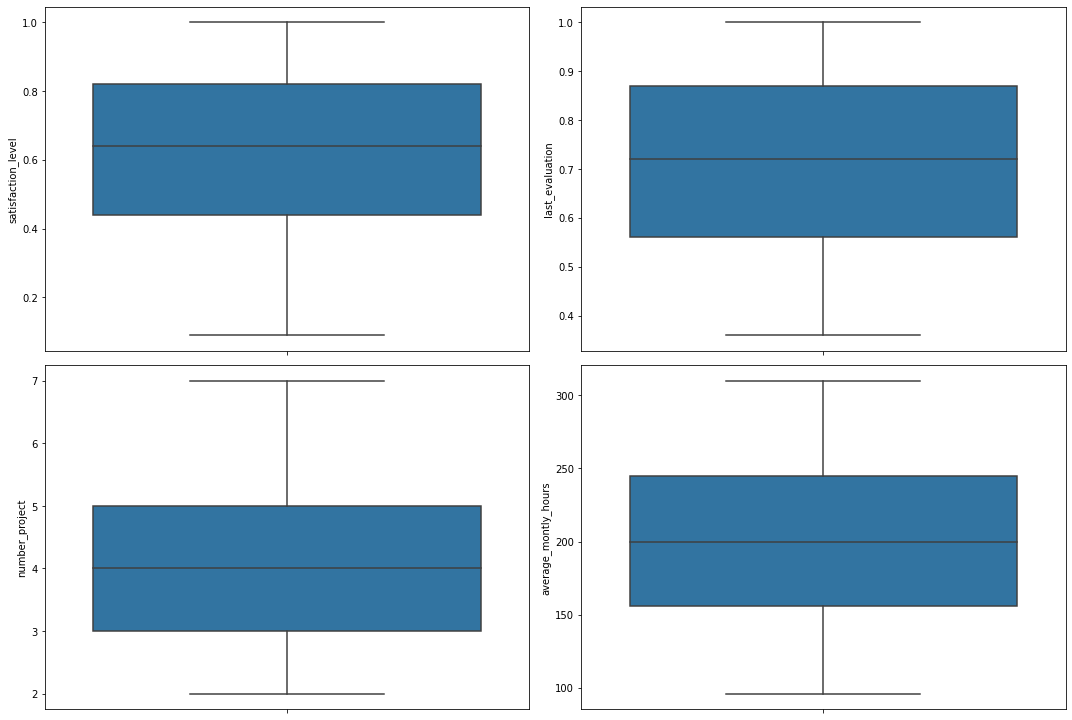

In [19]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.boxplot(y=df[col])
    plt_num += 1
plt.tight_layout()

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Python39\li

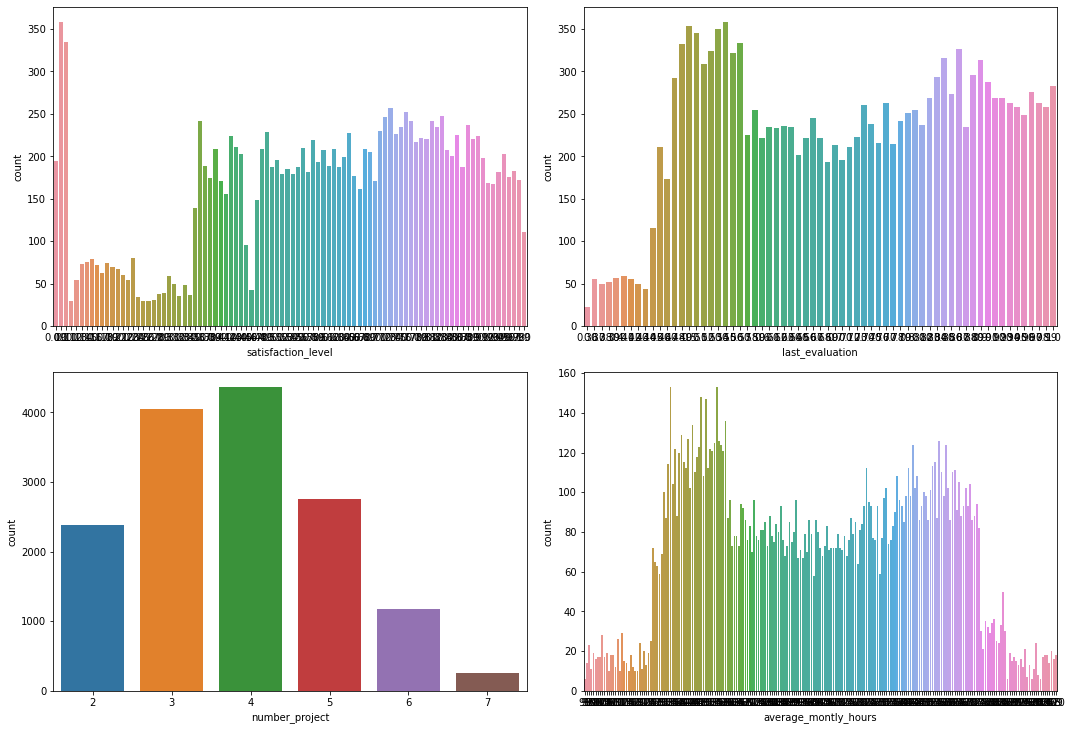

In [20]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.countplot(df[col])
    plt_num += 1
plt.tight_layout()

In [21]:
# sns.pairplot(data=df[:9])

#### Correlation

<AxesSubplot:>

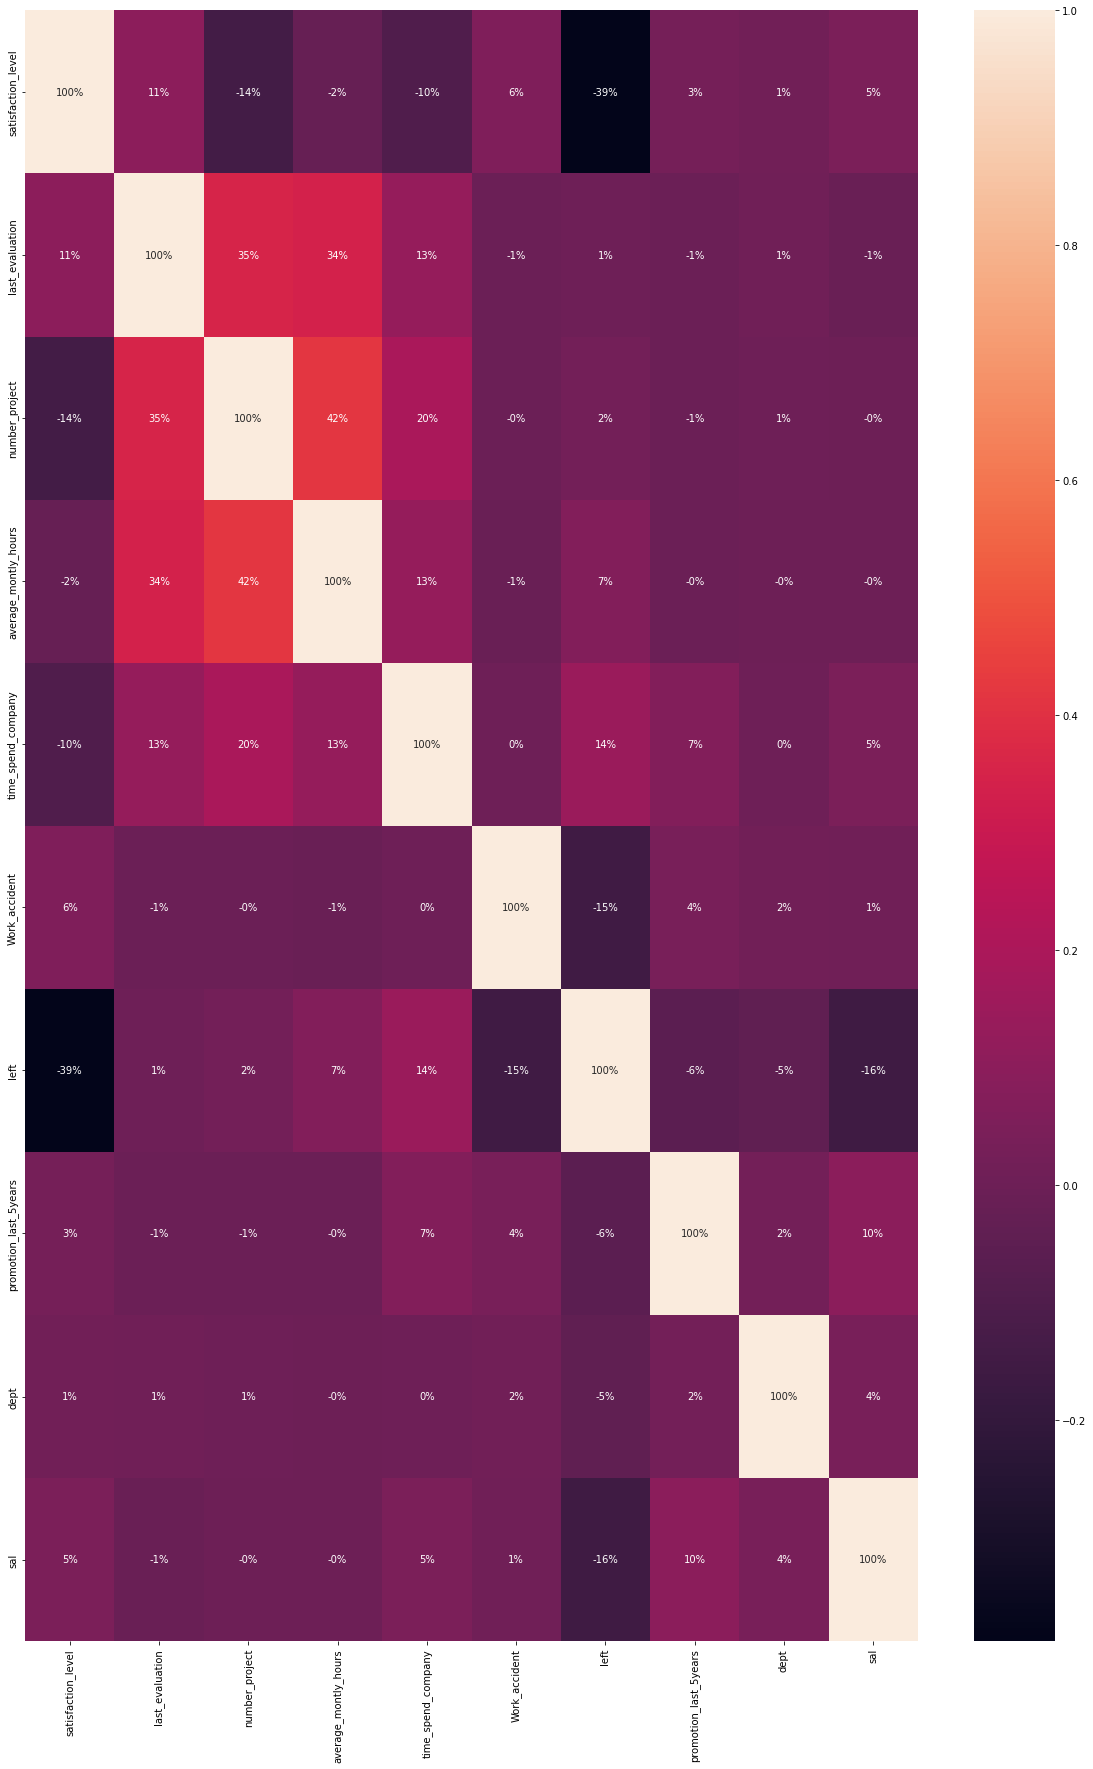

In [22]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

This heat map shows that there is no correlation

<br>

### Dependent and Independent Variables

In [23]:
X = df.drop('left', axis=1)
y = df['left']
print(X)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4          

In [24]:
len(X.columns)

9

### Feature Selection

The feature selection step decides which features are best option that can predict employee turnover with great accuracy or great performance. There are 17 features in X, we can select about 10 from them.

The feature selection step decides which features are best option that can predict employee turnover with great accuracy or great performance.
There are 17 features in X, we can select about 10 from them

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model)

rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True False False False False  True  True False  True]
[1 3 4 6 2 1 1 5 1]


You can see that feature selection chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. Now lets have a look at these columns:

In [26]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'sal'],
      dtype='object')

In [27]:
new_cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'dept', 'sal']

In [28]:
X = df[new_cols]
y = df['left']

<br>

### Train and Test Split

We will use scikit-learn machine learning libraries to perform train-test split. The train and test procedure is appropriate when you have deal with a very large dataset and because of that model perform quickly. Using train-test split we can evaluate machine learning algorithms for classification and regression.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=92)

### Model Building

In this process we will use different machine learning algorithms for prediction so, I am going to use three supervised learning machine learning such as Logistic Regression, Decision Tree and Random Forest. On the basis of this this three algorithms we will compare their accuracy and we get to know that which algorithm is best for model prediction.

#### Logistics Regression

In [30]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

In [31]:
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [32]:
model_logistic.score(X_train, y_train)

0.7714068006476807

In [33]:
model_logistic.score(X_test, y_test)

0.7686666666666667

**Accuracy score of the logistic regression is about 0.76 , which is not so good.**

<br>

#### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [35]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
model_tree.score(X_train, y_train)

0.9989522811696352

In [37]:
model_tree.score(X_test, y_test)

0.9675555555555555

**The accuracy score of the Decision Tree model is about 0.97. Which is quite good compare to Logistic Regression.**

<br>

#### Random Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [39]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
model_rf.score(X_train, y_train)

0.9989522811696352

In [41]:
model_rf.score(X_test, y_test)

0.9868888888888889

**The accuracy score of the Random Forest model is about 0.98. 
So We will, train our model using Random Forest hence, it is given the best accuracy**

<br>

### Model Evaluation

Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification. A machine learning classification model can be used to predict the actual class of the data point directly or predict its probability of belonging to different classes. The latter gives us more control over the result. We can determine our own threshold to interpret the result of the classifier. Confusion matrix helps us to find out four types of outcomes that could occur such as true positives, true negatives, false positives and false negatives.
Then we will find out the accuracy of the model, precision, recall for the model.


Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification.

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3439
           1       0.97      0.97      0.97      1061

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



Text(0.5, 1.0, 'Random Forest')

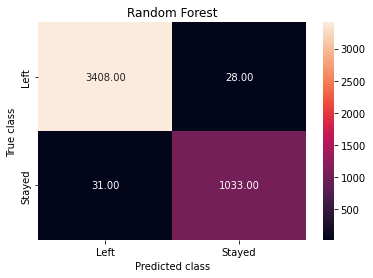

In [43]:
y_pred = model_rf.predict(X_test)

from sklearn.metrics import confusion_matrix

forest_cm = confusion_matrix(y_pred, y_test)

sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

##### AUC ROC Curve

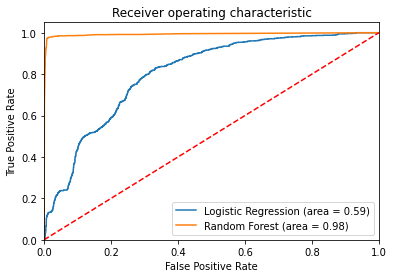

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#logistics
logit_roc_auc = roc_auc_score(y_test, model_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:,1])
# Random Forest
rf_roc_auc = roc_auc_score(y_test, model_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.

In [45]:
model_rf.feature_importances_

array([0.48910926, 0.17934155, 0.267057  , 0.01608833, 0.00277561,
       0.02584219, 0.01978605])

In [46]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'dept', 'sal'])
importance = model_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}    -> {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years    -> 0.28%
Work_accident    -> 1.61%
sal    -> 1.98%
dept    -> 2.58%
last_evaluation    -> 17.93%
time_spend_company    -> 26.71%
satisfaction_level    -> 48.91%


According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company, in ascending order.

In [47]:
from joblib import dump
dump(model_rf, './../savedModules/employee.joblib')

['./../savedModules/employee.joblib']